# **LOADING DATA**

In [9]:
import pandas as pd

df = pd.read_csv(r"..\data\heart_disease.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  num  
0  0.0   6.0    0  
1  3.0   3.0    2  
2  2.0   7.0    1  
3  0.0   3.0    0  
4  0.0   3.0    0  


**1.1 Handling Missing Values**

In [10]:
import numpy as np

# check missing values
print(df.isnull().sum())

# remove missing values
df.dropna(inplace=True)

# splitting numeric and categorical columns after dropping NaNs
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


1.2 Encode categorical variables

In [11]:
# one-hot encode for categoical columns
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


**1.3 Standardize numerical features**

In [12]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])
df_encoded.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.936181,0.691095,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145,-0.721976,0.655877,-0.767668
1,1.378929,0.691095,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781,2.478425,-0.894220,0.855089
2,1.378929,0.691095,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781,1.411625,1.172577,0.043711
3,-1.941680,0.691095,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.894220,-0.767668
4,-1.498933,-1.446980,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.894220,-0.767668


**final cleaned dataset**

In [13]:
df_clean = df_encoded.copy()
df_clean.to_csv('..\data\heart_disease_clean.csv', index=False)
df_clean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.936181,0.691095,-2.240629,0.750380,-0.276443,2.430427,1.010199,0.017494,-0.696419,1.068965,2.264145,-0.721976,0.655877,-0.767668
1,1.378929,0.691095,0.873880,1.596266,0.744555,-0.411450,1.010199,-1.816334,1.435916,0.381773,0.643781,2.478425,-0.894220,0.855089
2,1.378929,0.691095,0.873880,-0.659431,-0.353500,-0.411450,1.010199,-0.899420,1.435916,1.326662,0.643781,1.411625,1.172577,0.043711
3,-1.941680,0.691095,-0.164289,-0.095506,0.051047,-0.411450,-1.003419,1.633010,-0.696419,2.099753,2.264145,-0.721976,-0.894220,-0.767668
4,-1.498933,-1.446980,-1.202459,-0.095506,-0.835103,-0.411450,1.010199,0.978071,-0.696419,0.295874,-0.976583,-0.721976,-0.894220,-0.767668


### **1.4 EDA**

**1.4.1 Histogram**

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

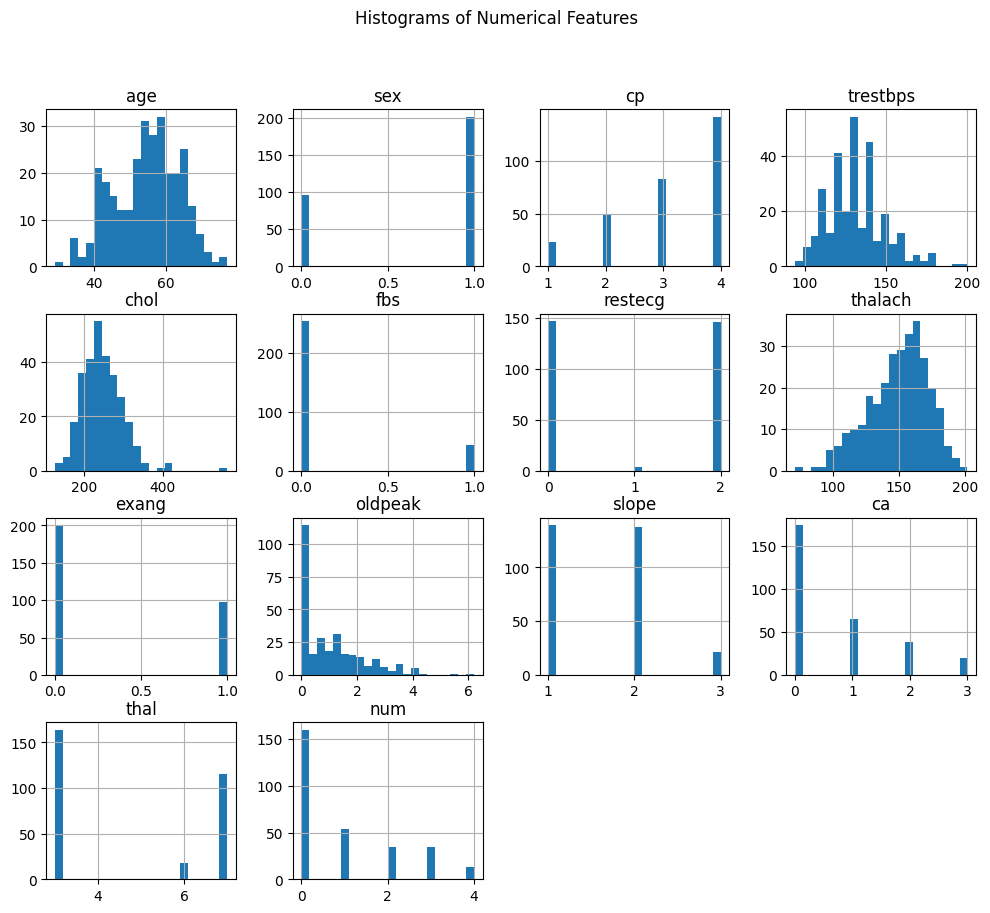

In [16]:
df[num_cols].hist(figsize=(12, 10), bins=22)
plt.suptitle("Histograms of Numerical Features")
plt.show()

**1.4.2 Correlation heatmap**

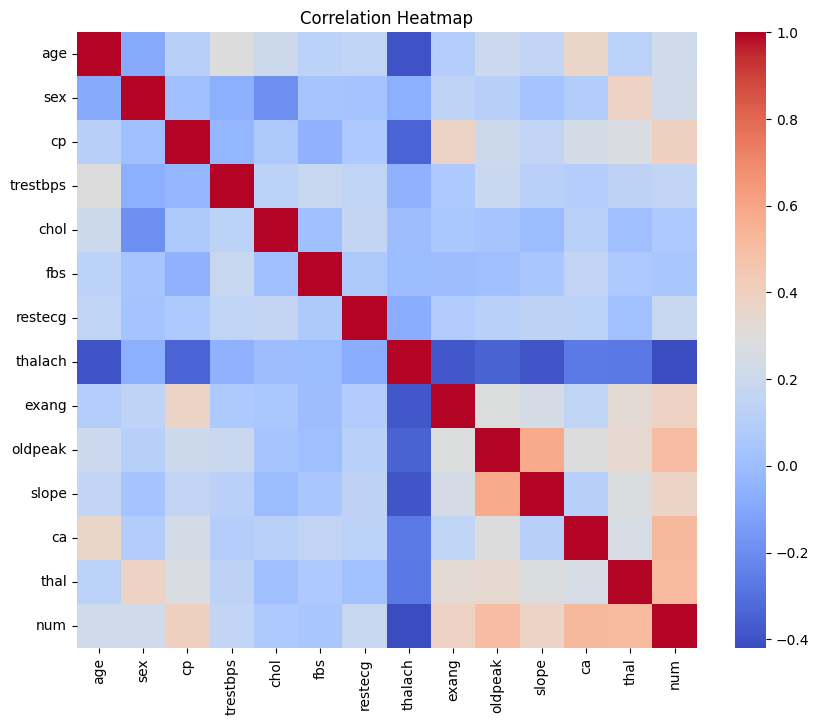

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(df_clean.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

**1.4.3 Boxplot**

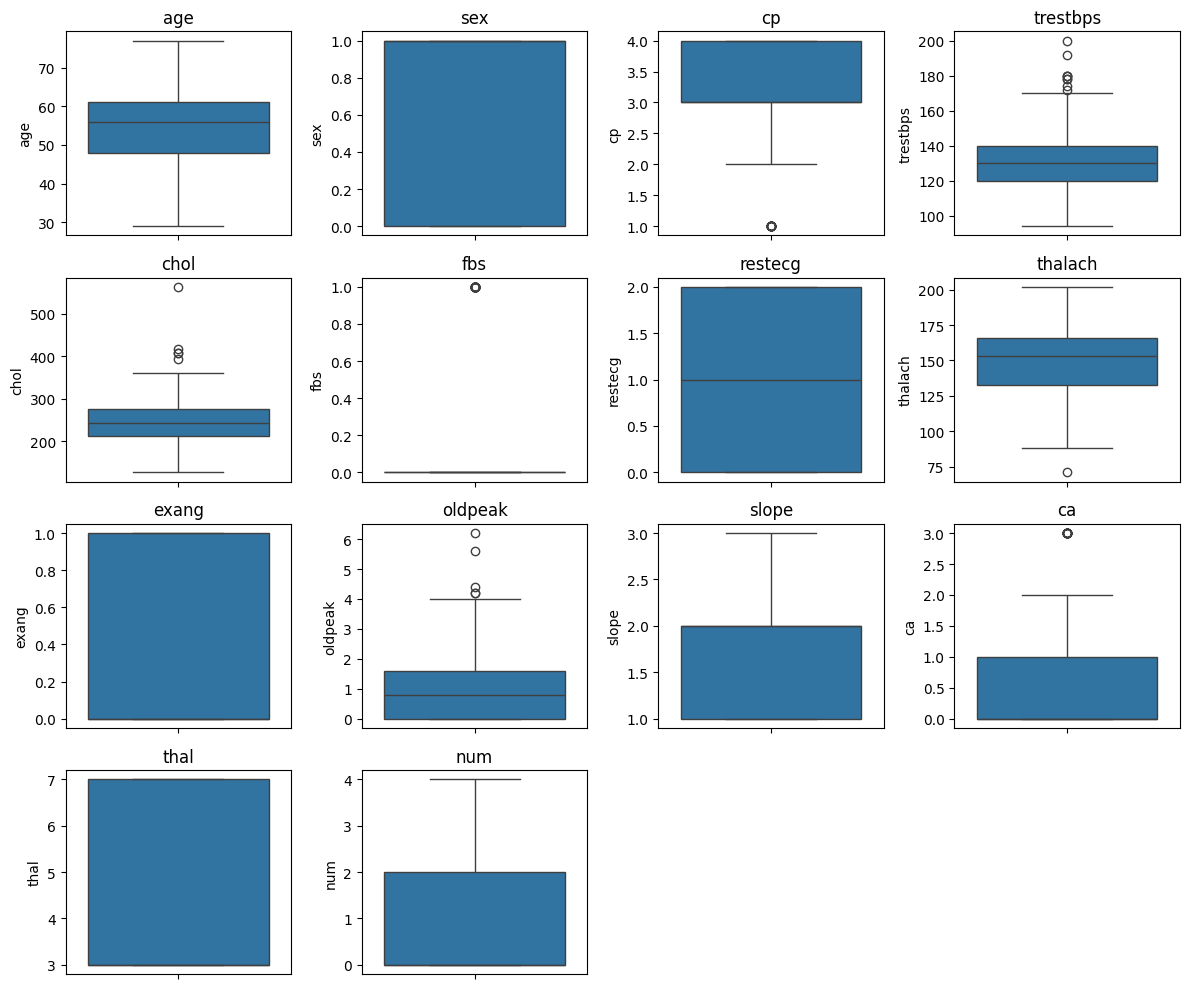

In [18]:
plt.figure(figsize=(12,10)) # Increased figure size for better visualization
for i, col in enumerate(num_cols, 1):
    plt.subplot(4, 4, i) # Changed to 4x4 grid to accommodate potentially more columns
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()




---

